In [1]:
import random_fields
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools

In [2]:
size =29
def generate_random_coords(size):
    return (np.random.uniform(0, size), np.random.uniform(0,size))
def generate_network_coords(size, num_sensors):
    return [generate_random_coords(size) for _ in range(num_sensors)]

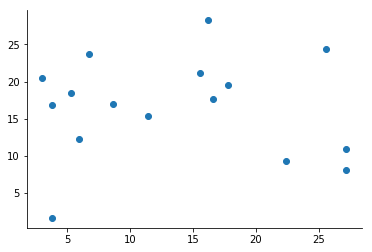

In [36]:
sensors = generate_network_coords(29, 16)
fig, ax = plt.subplots(1)
ax.scatter([i[0] for i in sensors], [i[1] for i in sensors])
sns.despine()

In [11]:
threedperturbation = random_fields.gpu_gaussian_random_field(size=30,scale=2, length=1)

In [5]:
def get_sensor_perturbations(sensors, perturbation):
    return [perturbation[round(i[0]),round(i[1]),:] for i in sensors]

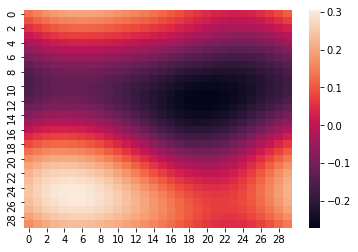

In [12]:
fig,ax = plt.subplots(1)
sns.heatmap(threedperturbation[:,:,0].real)

In [40]:
perturbs = get_sensor_perturbations(sensors, threedperturbation)

In [6]:
def naive_perturber(sensors, timeseries):
    #threedperturbation = random_fields.gpu_gaussian_random_field(size=30,scale=150, length=1)
    #factors = get_sensor_perturbations(sensors, threedperturbation)
    #print(factors)
    factors = [np.array([-0.5])]
    res = []
    for f in factors:
        fullfactor = np.array([f[0] for _ in timeseries])
        fullfactor+=1
        res.append(list(np.multiply(timeseries, fullfactor).real))
    return res
timeseries = 365*48*[1]
naive_perturber(sensors, timeseries)
        

[[-8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.189973831176758,
  -8.18997

In [3]:
import functools
def pairwise_distances(sensors):
    return scipy.spatial.distance.pdist(sensors)
def connection_probability(r_char, dist):
    beta = 1
    n =1
    ponent = (dist/r_char)**n
    return beta* np.exp(-(ponent))
def coin_flip(p):
    return p>0.5
def translate_vector_form(num_items, vector):
    actualidxs = list(itertools.combinations(range(num_items), 2))
    res = {actualidxs[i]:el for i,el in enumerate(vector)}
    return res
def soft_geometric_graph(r_char,sensors):
    connector = functools.partial(connection_probability, r_char)
    connections = coin_flip(connector(pairwise_distances(sensors)))
    readable = translate_vector_form(len(sensors), connections)
    return [i for i, val in readable.items() if val]

In [10]:
sensors = generate_network_coords(29, 32)
conns = soft_geometric_graph(15,sensors)

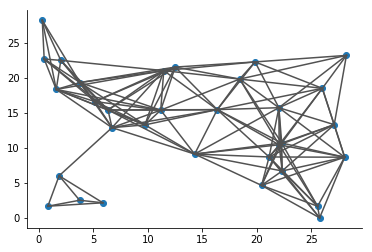

In [11]:
fig, ax = plt.subplots(1)
ax.scatter([i[0] for i in sensors], [i[1] for i in sensors])
connected = [(sensors[s1], sensors[s2]) for s1,s2 in conns]
for s1,s2 in connected:
    ax.plot([s1[0],s2[0]],[s1[1],s2[1]], c='#525252' )
sns.despine()

In [52]:
conns

[(3, 15),
 (8, 13),
 (7, 12),
 (2, 8),
 (1, 6),
 (0, 10),
 (1, 11),
 (6, 7),
 (2, 13),
 (11, 13),
 (7, 14),
 (4, 5),
 (13, 15),
 (2, 3),
 (0, 1),
 (6, 8),
 (2, 11),
 (5, 14),
 (1, 7),
 (11, 15),
 (9, 12),
 (5, 9),
 (4, 7),
 (4, 12),
 (6, 14),
 (1, 2),
 (5, 12),
 (10, 12),
 (1, 10),
 (3, 13),
 (6, 11),
 (1, 13),
 (8, 11),
 (4, 14),
 (9, 10),
 (5, 7),
 (0, 13),
 (1, 8),
 (2, 15)]

In [53]:
np.shape(scipy.spatial.distance.squareform(pairwise_distances(np.asarray(sensors))))

(8, 8)